In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

In [3]:
img = cv2.imread('depth1.jpg')
img2 = img.copy()

In [5]:
#make template image
template = cv2.imread('depth1crop.jpg')
w,h  = template.shape[:2]

In [4]:
template.shape[1]

67

In [ ]:
#multiscale template matching 
#loop over the scales of the image
for scale in np.linspace(0.2,1.0,20)[::-1]:
    #resize the template according to the scale and keep track of ratio of resizing
    #print('scale',scale)
    resized = imutils.resize(template, width = int(template.shape[1]*scale))
    r = template.shape[1]/float(resized.shape[1])
    #print('r', r)
    #if resized image smaller than template
    result = cv2.matchTemplate(img, resized, cv2.TM_CCOEFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    

max value at point (92628880.0, (326, 358))
min value at point (-30969204.0, (532, 323))


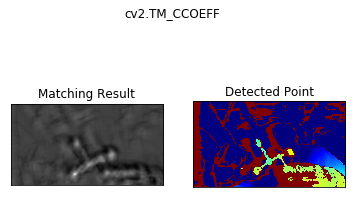

max value at point (0.9964555501937866, (326, 358))
min value at point (-0.37478625774383545, (731, 394))


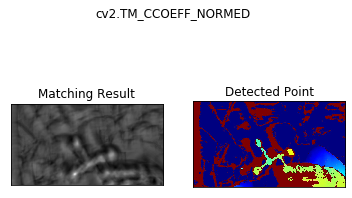

max value at point (205295232.0, (780, 412))
min value at point (30650694.0, (208, 302))


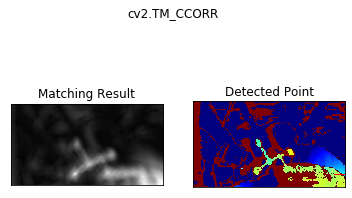

max value at point (0.9983361959457397, (326, 358))
min value at point (0.2481631636619568, (308, 179))


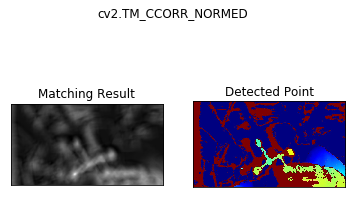

max value at point (338448288.0, (673, 298))
min value at point (685577.0, (326, 358))


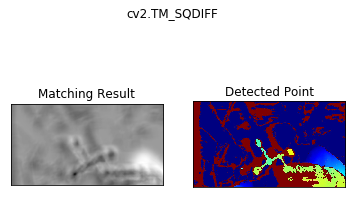

max value at point (1.0, (0, 0))
min value at point (0.003338211914524436, (326, 358))


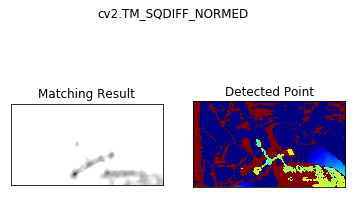

In [6]:
#all the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    #apply template matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('max value at point', (max_val, max_loc))
    print('min value at point', (min_val, min_loc))
    
    #if TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] +w, top_left[1]+h)
    
    cv2.rectangle(img,top_left, bottom_right, 255,2)
    
    plt.subplot(121), plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()